In [1]:
import os, sys
from pathlib import Path

root_path = Path(os.getcwd()).parent
sys.path.append(str(root_path) +'/')

morphomnist_path = root_path/'autoencoders'/'data'/'morphomnist'/'global'

In [2]:
from autoencoders.datasets import MorphomnistDataset
from torchvision import transforms 
from autoencoders.customTransforms import ToFloatMNIST

batch_size = 64
dataset = MorphomnistDataset(morphomnist_path, transforms.Compose([ToFloatMNIST(),transforms.ToTensor()]), gz=True)

In [3]:
import torchvision.transforms.functional as F

def show_np(imgs, features, labels,xlabel=True, title=None, n=None):
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):        
        axs[0, i].imshow(np.asarray(img), cmap='cividis') 
        xlabel= make_label(features[i], labels[i]) if xlabel else None
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[], xlabel=xlabel)
    plt.suptitle(title)   
    plt.close()
    return fig
    
def make_label(features, label):
    return f"Label: {label},  Thickness: {features[0]:.2f},\n Area: {features[1]:.2f}, Slant: {features[2]:.2f}"

In [4]:
import torch
from  torch.utils.data import DataLoader,random_split
import math
import numpy as np
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import pickle
from autoencoders.AE import AE

In [5]:
m =len(dataset)
train_data, val_data = random_split(dataset, [math.floor(m-m*0.2), math.ceil(m*0.2)], generator=torch.Generator().manual_seed(42))

train_loader = DataLoader(train_data, batch_size=batch_size)
val_loader = DataLoader(val_data, batch_size=batch_size)

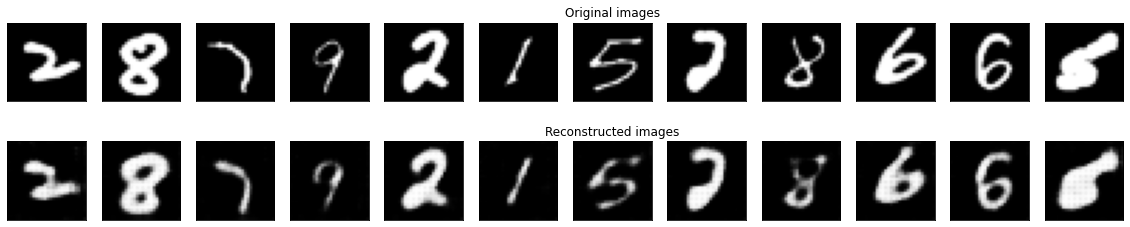

In [13]:
encoded_dim = 128
ae_model = AE(encoded_dim)
losses = {'mse_train_loss':[],'mse_val_loss':[]}

for epoch in (pbar := tqdm(range(5))):
    losses['mse_train_loss'].append(ae_model.train(train_loader))    
    losses['mse_val_loss'].append(ae_model.test(val_loader))
    
    clear_output()
    fig = ae_model.plot_ae_outputs(val_loader,12)
    display(fig)

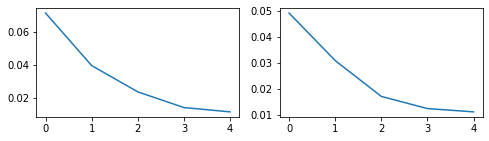

In [14]:
fig, axs = plt.subplots(1,2, figsize=(8,2))
axs[0].plot(losses['mse_train_loss'])
axs[1].plot(losses['mse_val_loss'])